In [1]:
import copy
import warnings

from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import sympy

 # Előkészületek

 ## A logisztikus egyenlet

 Legyen $K$ az eltartóképessége egy adott területnek, $r \in \mathbb{R}$ növekedési ráta, $P(t)$ egy függvény, és $P_0$ kezdeti populáció.Ekkor az adott populáció méretének válrozását $t$ függvényében a
 $$\frac{dP}{dt} = rP(1-\frac{P}{K})$$ differenciálegyenlet írja le.
 Ezt megoldva:




 >$\frac{dP}{dt} = \frac{r}{K}(\frac{1}{K}P-P^2)$, ez egy szétválasztható d.e.

 >$\frac{1}{dt}  = (\frac{r}{K}(\frac{1}{K}P-P^2))\frac{1}{dP} $,

>$dt  = \frac{K}{r}\cdot \frac{1}{(\frac{1}{K}P-P^2) }dP$ s most integrálva mindkét oldalt

>$∫dt  = \frac{K}{r} \cdot \int \frac{1}{(\frac{1}{K}P-P^2)} dP  $

>Ezt parciális törtekre bontva kapjuk, hogy

>$\frac{1}{\frac{1}{K}P-P^2} = \frac{K}{P} + \frac{K}{\frac{1}{K}-P}$, s innen

>$\int \frac{1}{(\frac{1}{K}P-P^2)dt} = K(∫ \frac{1}{P}dP + \int \frac{1}{\frac{1}{K}-P}dP) = K(\ln P-\ln(\frac{1}{K}-P)).$

>Innen

> $t = ln((\frac{P}{\frac{1}{K}-P})^K)$ adódik, azaz

> $e^\frac{t}{K} = (\frac{P}{\frac{1}{K}-P})$

> $\frac{1}{e^\frac{t}{K}} = \frac{1}{KP}-1$, s innen

>$$\frac{e^\frac{t}{K}}{K+Ke^\frac{t}{K}} = P$$.

Ez hasznos lesz később.



 ## Járványterjedési modellek és fertőzési ráta

 ### Az $SI$ modell

Egy fertőző vírust szeretnénk modellezni. Legyene $S$ az egészségese és legyen $I$ a fertőzők számát mérő függvény. Egy egészséges egyed megfertőződhet, ha találozik fertőzővel. Föltételezzük, hogy mindenki azonos valószínűséggel találkozik a többiekkel.
Tekintsük a $\Delta t$ idő alatt fertőzővé váló egyedek számát. A továbbiakban a fertőzők számának változását vizsgáljuk az idő függvényében. Ezt a mennyiséget fertőzési rátának fogjuk nevezni.

Legyen $\beta \Delta t$ annak a valószínűsége, hogy egy véletlenszerűen választott fertőző megfertőz egy véletlenszerűen választott egészséges egyedet $\Delta t$ idő alatt.
Ekkor tehát $\beta \Delta t S I$ az új fertőzöttek várható száma $\Delta t$ idő alatt, így $$I(t+\Delta t) = I(t) + \beta \Delta t S I,$$
s most véve a $t \rightarrow 0$ határátmenetet
$$\frac{dI}{dt} = \beta S I$$ adódik.
Tegyük fel, hogy a populációnk nagysága konstans $N$, ekkor
$$S+I = N$$ s innen $S$-t eliminálva egy logisztikus differenciálegyenlethez jutunk:
$$\frac{dI}{dt} = \beta N I \left(1-\frac{I}{N}\right)$$
E modell továbbgondolosából származik az összes többi általam a projekt folyamán megismert járványterjedési modell.

### Az $SIS$ modell

 A SIS modell az előbb megismert modellnek egy továbbfejlesztett változata, ahol egy fertőzött felépülhet, majd ismét fertőzővé vállhat. Legyen annak a valószínűsége, hogy egy fertőzött felépül $\Delta t$ idő alatt a $\gamma \Delta t$ szorzat. így azon fertőzők, akik felépülnek $\Delta t$ idő alatt $I(t)\gamma \Delta t$
Ekkor az előző modellből kiindulva
$$I(t + \Delta t) = I(t) + \beta\Delta t S(t)I(t)-\gamma\Delta t I(t).$$ Amint $\Delta t \rightarrow 0$ a $$\frac{dI}{dt} = \beta SI - \gamma I$$ egyenlet adódik átrendezéssel, s innen az $S = I + N$-t felhasználva a
$$\frac{dI}{dt} = (\beta N-\gamma)I\left(1-\frac {I}{N- \frac{\gamma}{\beta}}\right),$$ mely ismét logisztikus egyenlet $N- \frac{\gamma}{\beta}$ eltartóképességgel és $\beta N-\gamma$ növekedési rátával.

### A fertőzési ráta

A fertőzési ráta azt mutatja, hogy $t$ időpontban hányan kerülnek az egészségesek közül a fertőzők csoportjába. Az előző két modellben ez $\beta SI$ volt, ezt bilineárisnak nevezzük. Ez a tényező fontos szerepet játszik egy járvány modellezésekor így többféle fertőzési ráta született a járványterjedéssel kapcsolatos vizsgálatok során én eddig négyre bukkantam, ezek a következők:

 * standard fertőzési ráta: $\beta \frac{S}{N}I$
 * bilineáris fertőzési ráta $\beta SI$
 * telített fertőzési ráta $\frac{\beta SI}{1+\alpha I},$ ahol $\alpha\geq 0$
[link](https://reader.elsevier.com/reader/sd/pii/S0307904X07001242?token=72B4CD6B43D52EEF6F40D0888D5139BF54176722FF77CDD927F0D1270FA51B93674B56A0CEF3783F66769E3537BBAD1D&originRegion=eu-west-1&originCreation=20221022102811)
 * telített nem lineáris fertőzési ráta $\frac{\beta SI^q}{1+\alpha I^l},$ ahol $\alpha\geq 0, q,l > 0$
 [link](https://reader.elsevier.com/reader/sd/pii/S002203960200089X?token=55C96CF65652EC83D8C40E45C79DD0519B1597816D1FD553F2EDF4BD6CA47B2597702B4C62BF0F69377717DEEA5D6BB2&originRegion=eu-west-1&originCreation=20221022090109)




 # Az $SIS$ járványterjedési modell telített fertőzési rátával.

 A továbbiakban az új fertőzöttek számát fogjuk vizsgálni telített fertőzési rátát használva. Az eddigiek alapján ekkor a következő differenciálegynletet kell vizsgálnunk:

 $$\frac{dI}{dt} = \frac{\beta SI}{1+\alpha I} - \gamma I $$ ahol
  * $I$ a fertőzöttek száma $t$ függvényében
  * $S$ az egészségesek száma $t$ függvényében
  * $\alpha, \beta , \gamma$ nemnegatív arányossági tényezők
  * $q,l$ pozitív konstansok.

  Felhasználva, hogy $N = S+I$ az $S$ paramétert eliminálhatjuk és így a
  $$\frac{dI}{dt} = \frac{\beta (N-I)I}{1+\alpha I} - \gamma I $$
  differenciálegyenlethez jutunk.
  Ezt szorzattá alakítva:

  $$I \cdot \frac{-(\beta+\gamma \alpha)I + (\beta N-\gamma)}{\alpha I + 1}$$
  Majd Elvégezve az eukklideszi algoritmust a szorzat második tagjára:
  $$I((\beta N - \gamma) -(\beta + \alpha \gamma)I)$$

  majd $(\beta N - \gamma)$-t kiemelve a

  $$(\beta N - \gamma)I(1-\frac{I}{\frac{\beta N - \gamma}{\beta + \alpha \gamma}})$$

  logisztikus egyenlet adódik $\beta N - \gamma$ növekedési rátával és $\frac{\beta N - \gamma}{\beta + \alpha \gamma}$ eltartóképességgel.

In [2]:
def f(I, param: dict):
  return (param["beta"] * (param["N"]-param["gamma"]) * I * (1-I/((param["beta"] * param["N"] - param["gamma"])/(param["beta"] + param["alpha"] * param["gamma"]))))

In [3]:
def f_eq(I, ts, param):
  return (param["beta"] * (param["N"]-param["gamma"]) * I * (1-I/((param["beta"] * param["N"] - param["gamma"])/(param["beta"] + param["alpha"] * param["gamma"])))) * np.cos(ts)

In [4]:
def f_ts(I, ts, param):
  return (param["beta"] * (param["N"]-param["gamma"]) * I * (1-I/((param["beta"] * param["N"] - param["gamma"])/(param["beta"] + param["alpha"] * param["gamma"])))) * ts

In [5]:
params = {"beta":0.2,
          "N":10.0,
          "alpha":0.3,
          "gamma":0.5}


In [6]:
capacity = ((params["beta"] * params["N"] - params["gamma"])/(params["beta"] + params["alpha"] * params["gamma"]))
growth = (params["beta"] * (params["N"]-params["gamma"]))

In [7]:
params.values()

dict_values([0.2, 10.0, 0.3, 0.5])

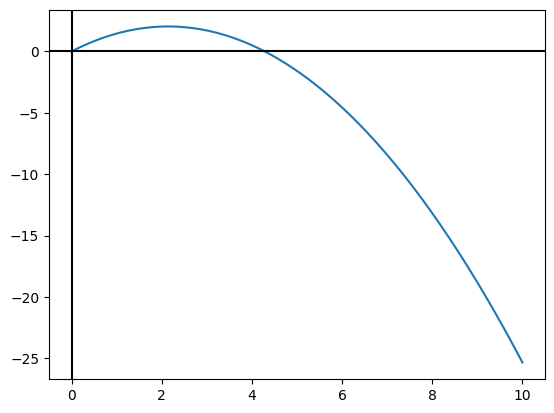

In [8]:
x_f = np.linspace(0, 10, 100)
y_f = f(I=x_f, param=params)
plt.plot(x_f, y_f)
plt.axhline(0, c="black")
plt.axvline(0, c="black")

 ## Iránymező és egyensúlyi helyzet

In [9]:
t_max = 10
t = np.linspace(0,t_max,100)
x_0 = 1

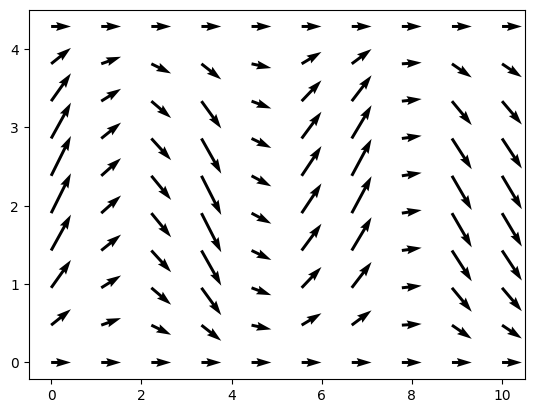

In [10]:
t_m, x_m = np.meshgrid(np.linspace(0, t_max, 10),
                       np.linspace(0, capacity, 10))
u_m = 1
v_m = f_eq(I = x_m, ts=t_m, param=params)
plt.quiver(t_m, x_m, u_m, v_m)

In [11]:
eq_1 = fsolve(func=f, x0=0,
              args=(params, ))[0]
eq_1

np.float64(0.0)

In [12]:
eq_2 = fsolve(func=f, x0=capacity,
              args=(params, ))[0]

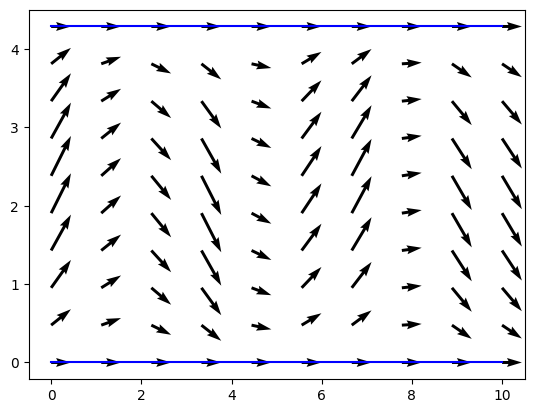

In [13]:
t_m, x_m = np.meshgrid(np.linspace(0, t_max, 10),
                       np.linspace(0, capacity, 10))
u_m = 1
v_m = f_eq(I = x_m, ts=t_m, param=params)
plt.quiver(t_m, x_m, u_m, v_m)
plt.plot(t, eq_1 * np.ones(len(t)), c="blue")
plt.plot(t, eq_2 * np.ones(len(t)), c="blue")

 # Kezdeti érték probléma


In [14]:
sol = odeint(func=f_ts,
             y0=x_0, t=t,
             args=(params, ))

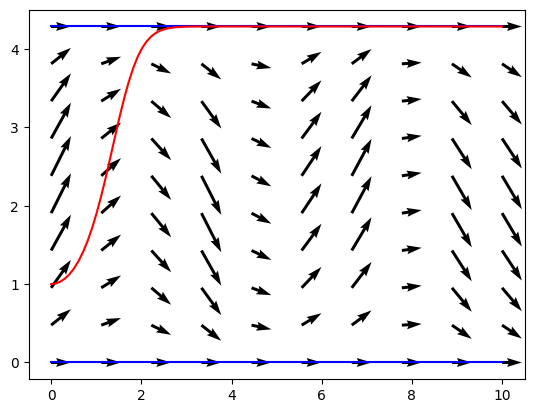

In [15]:
t_m, x_m = np.meshgrid(np.linspace(0, t_max, 10),
                       np.linspace(0, capacity, 10))
u_m = 1
v_m = f_eq(I = x_m, ts=t_m, param=params)
plt.quiver(t_m, x_m, u_m, v_m)
plt.plot(t, eq_1 * np.ones(len(t)), c="blue")
plt.plot(t, eq_2 * np.ones(len(t)), c="blue")
plt.plot(t, sol, c="red")


 # Vizulazáció

In [16]:
def f(I, param: dict):
  return (param["beta"] * (param["N"]-param["gamma"]) * I * (1-I/((param["beta"] * param["N"] - param["gamma"])/(param["beta"] + param["alpha"] * param["gamma"]))))

In [17]:
def f_eq(I: np.ndarray, ts: np.ndarray, param: dict):
  return f(I=I, param=param)

In [18]:
@interact(beta=(0, 1, 0.05),
          gamma=(0, 1, 0.05),
          alpha=(0, 1, 0.05),
          N = (0,100,1),
          x_0=(0, 10, 1.0),
          t_max=(10, 30, 5.0))
def plot(beta: float = 0.15, gamma: float = 0.12,
         alpha: float = 0.5, x_0: float = 5,
         t_max: float = 20, N: float = 10):
  # 0. Változó paraméterek alapján létrehozott változók
  ps_i = {"beta": beta, "gamma": gamma, "alpha": alpha, "N" : N}  # paraméter dict
  t = np.linspace(0, t_max, 100)  # időintervallum beosztással

  # 1. Üres ábrák létrehozása
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  # Néhány formázás
  fig.suptitle("telített fertőzési ráta")

  ax[0].set_ylim(0, ((ps_i["beta"]*ps_i["N"]-ps_i["gamma"])/(ps_i["beta"]+ps_i["alpha"]*ps_i["gamma"])))
  ax[0].set_xlabel("t")
  ax[0].set_ylabel("populáció")
  # 2. Iránymező
  t_m, x_m = np.meshgrid(np.linspace(0, t_max, 10),
                       np.linspace(0, ((ps_i["beta"]*ps_i["N"]-ps_i["gamma"])/(ps_i["beta"]+ps_i["alpha"]*ps_i["gamma"])), 10))
  u_m = 1
  v_m = f_eq(I = x_m, ts=t_m, param=ps_i)
  ax[1].quiver(t_m, x_m, u_m, v_m)


interactive(children=(FloatSlider(value=0.15, description='beta', max=1.0, step=0.05), FloatSlider(value=0.12,…